## Random Forest - Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.000,2013.628,2.892,2003.000,2012.000,2014.000,2016.000,2018.000
Selling_Price,301.000,4.661,5.083,0.100,0.900,3.600,6.000,35.000
Present_Price,301.000,7.628,8.644,0.320,1.200,6.400,9.900,92.600
Kms_Driven,301.000,36947.206,38886.884,500.000,15000.000,32000.000,48767.000,500000.000
Owner,301.000,0.043,0.248,0.000,0.000,0.000,0.000,3.000


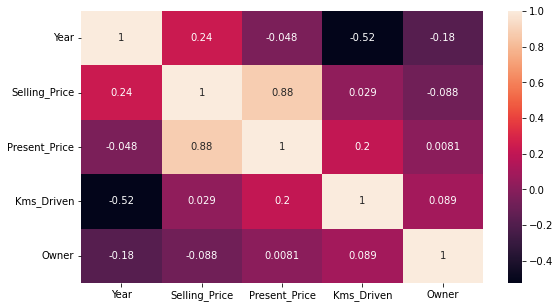

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [9]:
df["vehicle_age"]=2022-df.Year

In [10]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [11]:
df.drop(columns=["Car_Name","Year"], inplace=True)

In [12]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.350,5.590,27000,Petrol,Dealer,Manual,0,8
1,4.750,9.540,43000,Diesel,Dealer,Manual,0,9
2,7.250,9.850,6900,Petrol,Dealer,Manual,0,5
3,2.850,4.150,5200,Petrol,Dealer,Manual,0,11
4,4.600,6.870,42450,Diesel,Dealer,Manual,0,8


<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

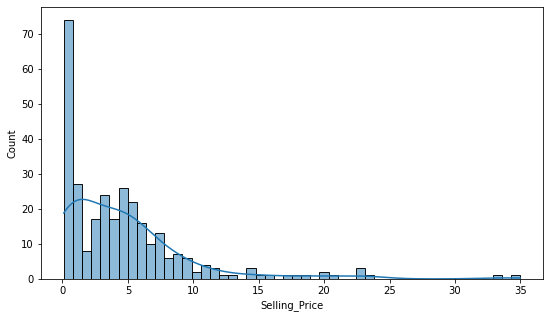

In [13]:
sns.histplot(df.Selling_Price, bins=50, kde=True)

<AxesSubplot:xlabel='Selling_Price'>

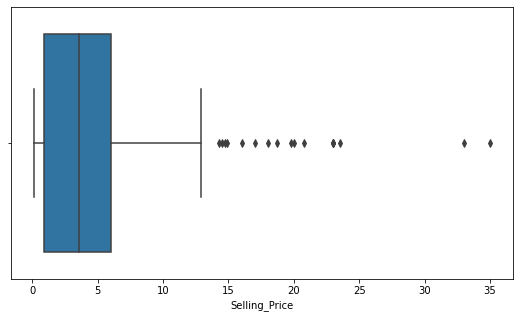

In [14]:
sns.boxplot(df.Selling_Price)

## Train test split

In [15]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=101)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 7)
Train target shape   :  (240,)
Test features shape  :  (61, 7)
Test target shape    :  (61,)


In [17]:
cat = X.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

## Modeling with Pipeline

In [18]:
cat = X.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('RF_model', RandomForestRegressor(random_state=101))])

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [22]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.988,0.767
mae,0.240,0.655
mse,0.370,2.240
rmse,0.609,1.497


In [23]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.888
test_neg_mean_absolute_error       -0.697
test_neg_mean_squared_error        -3.112
test_neg_root_mean_squared_error   -1.457
dtype: float64

## Removing Outliers

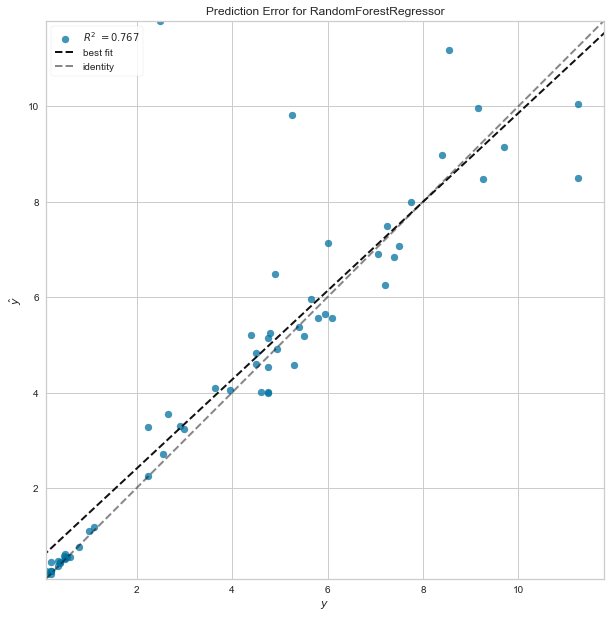

In [24]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

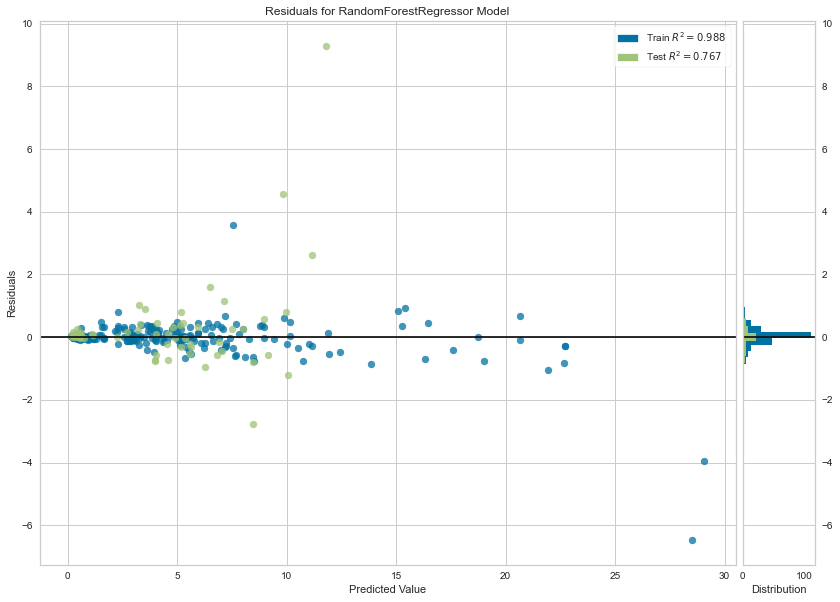

In [25]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = pipe_model
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();       

In [26]:
len(df[df.Selling_Price > 10])

28

In [27]:
28/301

0.09302325581395349

In [28]:
df_new = df[df.Selling_Price < 10]
df_new.sample(10)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
155,0.480,0.510,4300,Petrol,Individual,Automatic,0,5
71,4.500,12.480,45000,Diesel,Dealer,Manual,0,11
188,0.250,0.570,18000,Petrol,Individual,Manual,0,9
17,7.750,10.790,43000,Diesel,Dealer,Manual,0,6
8,8.750,8.890,20273,Diesel,Dealer,Manual,0,6
209,4.850,5.700,21125,Diesel,Dealer,Manual,0,7
23,2.500,3.460,45280,Petrol,Dealer,Manual,0,8
128,0.800,0.870,3000,Petrol,Individual,Manual,0,5
92,3.510,13.700,75000,Petrol,Dealer,Manual,0,17
296,9.500,11.600,33988,Diesel,Dealer,Manual,0,6


In [29]:
X = df_new.drop(columns="Selling_Price")
y = df_new.Selling_Price

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [31]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('RF_model', RandomForestRegressor(random_state=101))])

In [32]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.991,0.960
mae,0.159,0.383
mse,0.061,0.325
rmse,0.247,0.570


In [33]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(random_state=101))]

model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 5)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.937
test_neg_mean_absolute_error       -0.442
test_neg_mean_squared_error        -0.424
test_neg_root_mean_squared_error   -0.647
dtype: float64

## Visualizing trees

In [34]:
features = list(X_train.select_dtypes("object").columns) + list(X_train.select_dtypes("number").columns)
features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

In [35]:
from sklearn.tree import plot_tree

def report_model(model, number_of_tree):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree],filled=True, feature_names=features, fontsize=8);

In [36]:
RF_model = RandomForestRegressor(n_estimators=250, max_depth=4, random_state=101)

operations = [("OrdinalEncoder", column_trans), ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations)
pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('RF_model',
                 RandomForestRegressor(max_depth=4, n_estimators=250,
                                       random_state=101))])



      train  test
R2    0.951 0.964
mae   0.368 0.388
mse   0.338 0.295
rmse  0.581 0.543




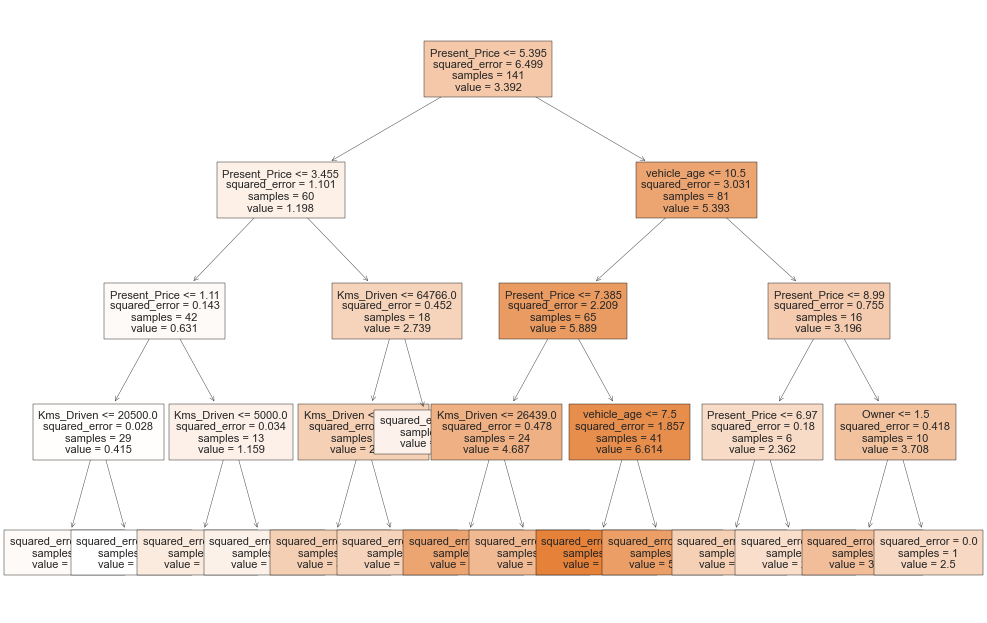

In [37]:
report_model(pruned_tree, 50)

## GridSearch

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(random_state=101))]

model = Pipeline(steps=operations)

In [40]:
param_grid = {"RF_model__n_estimators":[ 64, 128, 250],
              "RF_model__max_depth": [4,5],
              "RF_model__min_samples_leaf": [1, 2, 3],
              "RF_model__min_samples_split": [2, 3, 5],
              "RF_model__max_features":['auto', X.shape[1]/3, 6]}

In [41]:

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1)

In [42]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [4, 5],
                         'RF_model__max_features': ['auto', 2.3333333333333335,
                                                    6],
                    

In [43]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('RF_model',
                 RandomForestRegressor(max_depth=5, n_estimators=128,
                                       random_state=101))])

In [44]:
grid_model.best_params_

{'RF_model__max_depth': 5,
 'RF_model__max_features': 'auto',
 'RF_model__min_samples_leaf': 1,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 128}

In [45]:
grid_model.best_score_

-0.6736117409896947

In [46]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.973,0.967
mae,0.290,0.359
mse,0.188,0.274
rmse,0.434,0.523


In [47]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(max_depth=5, n_estimators=128,
                                       random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 5)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.932
test_neg_mean_absolute_error       -0.462
test_neg_mean_squared_error        -0.460
test_neg_root_mean_squared_error   -0.674
dtype: float64

## Feature Importance

In [48]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(max_depth=5, n_estimators=128,
                                       random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('RF_model',
                 RandomForestRegressor(max_depth=5, n_estimators=128,
                                       random_state=101))])

In [49]:
features = list(X_train.select_dtypes("object").columns) + list(X_train.select_dtypes("number").columns)
features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

In [50]:
pipe_model["RF_model"].feature_importances_

array([3.37171737e-03, 1.14200616e-02, 9.56769204e-04, 8.42343240e-01,
       2.34054306e-02, 4.24930774e-05, 1.18460288e-01])

In [51]:
df_f_i = pd.DataFrame(data = pipe_model["RF_model"].feature_importances_, index=features,
                      columns = ["Feature Importance"]).sort_values("Feature Importance", ascending=False)
df_f_i

,Feature Importance
Present_Price,0.842
vehicle_age,0.118
Kms_Driven,0.023
Seller_Type,0.011
Fuel_Type,0.003
Transmission,0.001
Owner,0.000


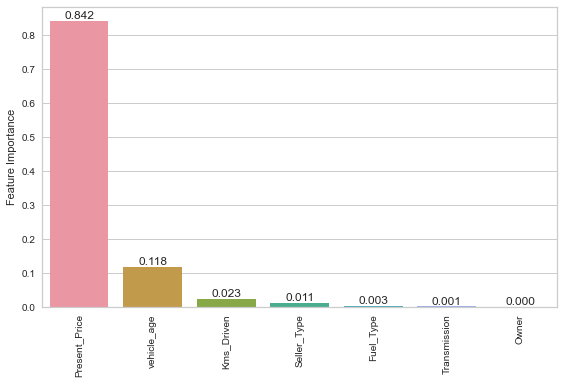

In [52]:
ax =sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation = 90)
plt.tight_layout()

## Feature Selection

In [53]:
X2 = X[["Present_Price", "vehicle_age", "Kms_Driven"]]
X2.sample(10)

,Present_Price,vehicle_age,Kms_Driven
248,4.600,9,30000
177,0.570,6,24000
158,0.540,5,8600
169,0.540,7,14000
233,5.700,9,53000
8,8.890,6,20273
137,0.787,9,16000
282,14.000,8,63000
121,1.500,11,6900
174,0.720,7,38600


In [54]:
X_train,X_test,y_train,y_test=train_test_split(X2, y,test_size=0.2, random_state=101)

In [55]:
cat2 = []

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2), remainder='passthrough')


operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(max_depth=5, n_estimators=128,
                                       random_state=101))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train,y_train)
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.971,0.966
mae,0.296,0.358
mse,0.197,0.278
rmse,0.444,0.527


In [56]:
pipe_model.feature_names_in_

array(['Present_Price', 'vehicle_age', 'Kms_Driven'], dtype=object)

In [57]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(max_depth=5, n_estimators=128,
                                       random_state=101))]

model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.923
test_neg_mean_absolute_error       -0.470
test_neg_mean_squared_error        -0.498
test_neg_root_mean_squared_error   -0.681
dtype: float64

## Final Model

In [58]:
X2.head()

,Present_Price,vehicle_age,Kms_Driven
0,5.590,8,27000
1,9.540,9,43000
2,9.850,5,6900
3,4.150,11,5200
4,6.870,8,42450


In [59]:
pd.DataFrame(column_trans.fit_transform(X2)).head()

,0,1,2
0,5.590,8.000,27000.000
1,9.540,9.000,43000.000
2,9.850,5.000,6900.000
3,4.150,11.000,5200.000
4,6.870,8.000,42450.000


In [60]:
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [61]:
cat2 = []

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2), remainder='passthrough')


operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestRegressor(max_depth=5, n_estimators=128,
                                       random_state=101))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X2, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  [])])),
                ('RF_model',
                 RandomForestRegressor(max_depth=5, n_estimators=128,
                                       random_state=101))])

## Prediction

In [62]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[1, 9]}

In [63]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.000,25000,Petrol,Dealer,Manual,0,1
1,9.500,44000,Diesel,Individual,Automatic,1,9


In [64]:
pipe_model.predict(df_samples)

array([5.39902385, 5.37155885])